0. Objectives: 
    Get to know pandas and seaborn libraries 
    
    
    python3 with packages:
    pandas
    seaborn for plots
    
1. Information about dataset

    Dataset from https://archive.ics.uci.edu/ml/datasets/auto+mpg
    Columns:
    1. mpg: continuous 
    2. cylinders: multi-valued discrete 
    3. displacement: continuous 
    4. horsepower: continuous 
    5. weight: continuous 
    6. acceleration: continuous 
    7. model year: multi-valued discrete 
    8. origin: multi-valued discrete 
    9. car name: string (unique for each instance)

    Missing Attribute Values:  horsepower has 6 missing values

2. Research questions: 
    2.1 Is there a single atribute that can predict mpg?
    2.2 Which combination of atributes predicts mpg (miles per gallon) value the best?

In [65]:
import math
import numpy
import pandas
import seaborn


data_frame=pandas.read_fwf('auto-mpg.data',names=["mpg", "cylinders", "displacement", 
                                                  "horsepower", "weight", "acceleration", "model year", 
                                                  "origin", "car name"]) # read fixed width file
data_frame.shape #number of (rows, columns)

(398, 9)

In [66]:
data_frame #shows first five rows. tail() shows last five rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,"""ford ranger"""


In [67]:
data_frame.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [68]:
data_frame.median() # Same as 50% (percentiles)

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [69]:
#find mean using formula
mean_value=sum(data_frame.mpg)/data_frame["mpg"].count() #mean - average of all the values in the column
mean_value

23.514572864321615

In [70]:
# Find variance using formula. Used for standard deviation
def variance(dataframe_column):
    variance = 0
    sum_of_squared_difference = 0
    for item in dataframe_column:
        sum_of_squared_difference += pow((item-round(mean_value,6)),2)
    variance = sum_of_squared_difference/(data_frame["mpg"].count()-1) #formula for sample; sample size-1, pandas default
    return round(variance,6)
variance(data_frame["mpg"])

61.089611

In [71]:
# Find standard deviation using formula
standard_deviation = math.sqrt(variance(data_frame["mpg"]))
standard_deviation

7.81598432700578

In [72]:
data_frame["mpg"].std(ddof=1)  # Delta Degrees of Freedom. The divisor used in calculations is (N - ddof), where N represents the number of elements.

7.815984312565782

In [73]:
data_frame[["mpg","model year"]]

,mpg,model year
0,18.0,70
1,15.0,70
2,18.0,70
3,16.0,70
4,17.0,70
...,...,...
393,27.0,82
394,44.0,82
395,32.0,82
396,28.0,82


Different plots, same data

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

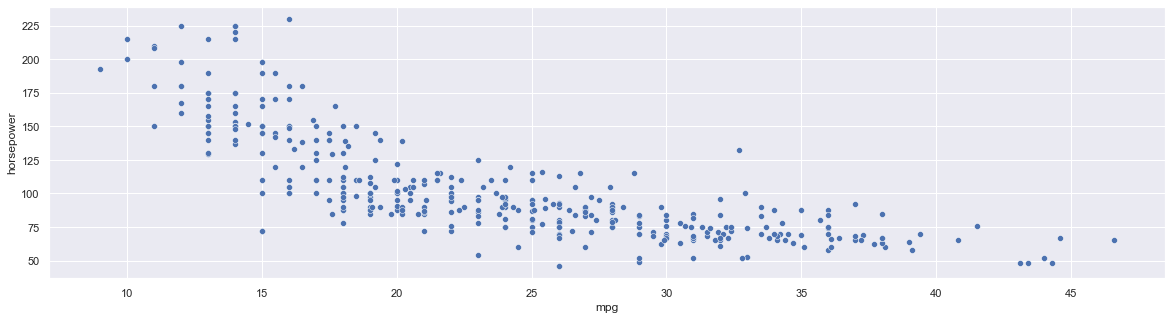

In [74]:
seaborn.set_theme(rc={'figure.figsize':(20,5)}) # customize plot https://matplotlib.org/3.2.2/tutorials/introductory/customizing.html
seaborn.scatterplot(data=data_frame[["mpg","horsepower"]], y="horsepower", x="mpg")

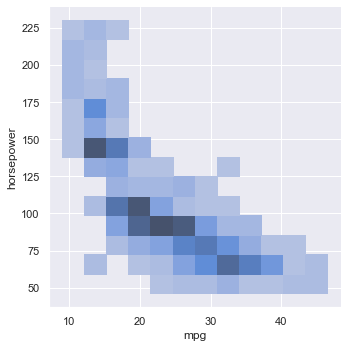

In [75]:
seaborn.displot(data=data_frame[["mpg","horsepower"]], y="horsepower", x="mpg")#(data=data_frame[["mpg","displacement"]], y="mpg", x="displacement", hue=data_frame["origin"])

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

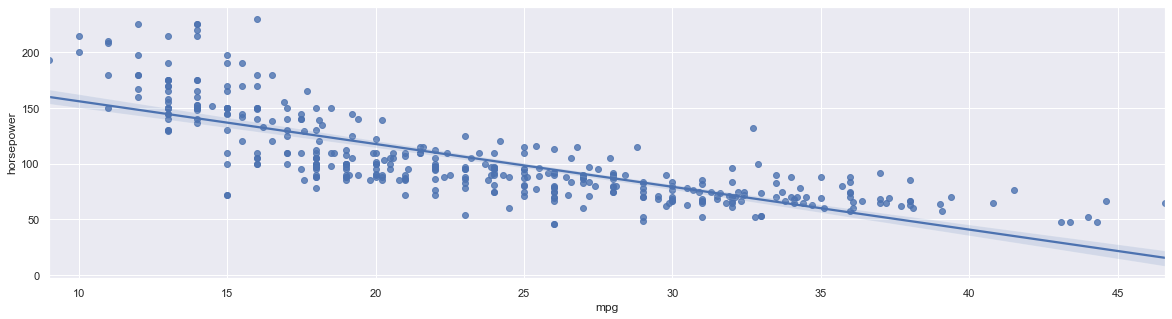

In [76]:
seaborn.regplot(data=data_frame[["mpg","horsepower"]], y="horsepower", x="mpg")
#(data=data_frame[["mpg","model year"]], y="mpg", x="model year")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

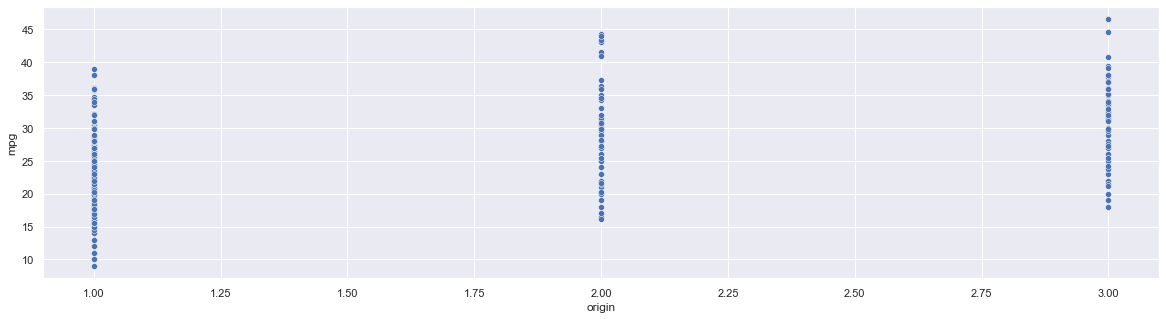

In [92]:
seaborn.scatterplot(data=data_frame[["mpg","origin"]], x="origin", y="mpg")

Split training and test set. Use following features "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin" to predict mpg value.

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(data_frame)
data_frame_no_nulls = data_frame.dropna(subset=['horsepower']) # remove records with 'null' values
data_frame_no_nulls = data_frame_no_nulls.reset_index(drop=True)
print(data_frame_no_nulls)



      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model year  origin                     car name  
0            70       1  "chevrolet chevelle malibu"  
1            70       1  

In [78]:
features = data_frame_no_nulls.drop(["mpg", "car name"], axis=1)
target = data_frame_no_nulls["mpg"]
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.3, random_state=100, 
                                                                            shuffle=True)


In [79]:
model = LinearRegression()


In [80]:
model.fit(features_train, target_train)


LinearRegression()

In [81]:

print("Intrception: ", model.intercept_)
model_coefs = pandas.DataFrame({'Feature/Column':list(features_train.columns), 
'Coefficient': model.coef_}).sort_values(by='Coefficient',ascending=False) 
print()
print(model_coefs) 
# For every one-unit increase in feature, the mpg increases by coefficient when all other variables are held constant.

Intrception:  -17.711803529588046

  Feature/Column  Coefficient
6         origin     1.618637
5     model year     0.734823
4   acceleration     0.165113
1   displacement     0.025179
3         weight    -0.006426
2     horsepower    -0.032590
0      cylinders    -0.374471


In [82]:
target_pred = model.predict(features_test)
target_pred

array([20.71583956, 28.15422546, 30.94236911, 24.79623704, 27.0195287 ,
       11.99277183, 34.31707133, 18.57939432, 28.032728  , 21.85178276,
       20.24216229, 28.31130945, 24.2700595 , 26.2972445 , 30.43612975,
       27.9878452 , 10.11329081, 31.36088971, 20.88046345, 24.51879206,
        6.40131585, 21.22564443, 16.41105372, 27.48729351, 19.87677811,
       27.9990026 , 30.28872047, 19.48048342, 26.00784953, 20.56426275,
       31.81154683, 20.63606955, 22.13183306, 13.94996691, 34.43855241,
       18.05635537, 22.00411339, 27.07143949, 18.15401022, 11.3440506 ,
       26.22245875, 21.75855781, 18.84953637, 14.0291218 , 20.24400567,
       29.75551618, 24.09570087, 21.60056492, 28.03802481, 23.29286845,
       24.54904669, 25.36407664, 27.57806154, 13.28160084, 25.34943283,
       24.43586886, 24.26261061, 30.4343015 , 23.45211012, 10.45164862,
        9.71803165, 35.85818933, 30.44382055, 30.74583588, 13.0300035 ,
       30.24183413, 15.66778395, 30.39128912, 20.21285747, 18.25

In [83]:
from sklearn.metrics import r2_score, mean_squared_error

print("The R-squared score is {:.4f}".format(r2_score(target_test, target_pred)))
print("The root mean squared error is {:.4f}. Values closer to zero are better.".format(numpy.sqrt(mean_squared_error(target_test, target_pred))))
print ("__________________________")

The R-squared score is 0.7997
The root mean squared error is 3.2424. Values closer to zero are better.
__________________________


In [84]:
print(features)

     cylinders  displacement  horsepower  weight  acceleration  model year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
387          4         140.0        86.0  2790.0          15.6          82   
388          4          97.0        52.0  2130.0          24.6          82   
389          4         135.0        84.0  2295.0          11.6          82   
390          4         120.0        79.0  2625.0          18.6          82   
391          4         119.0        82.0  2720.0          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

In [85]:
data_frame_for_distribution = data_frame.drop(["car name", "origin", "cylinders"], axis=1)
data_frame_for_countplot = data_frame.drop(["mpg", "displacement", 
                                                  "horsepower", "weight", "acceleration", "model year", 
                                                  "car name"], axis=1)

In [86]:
data_frame_for_countplot["origin"]

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

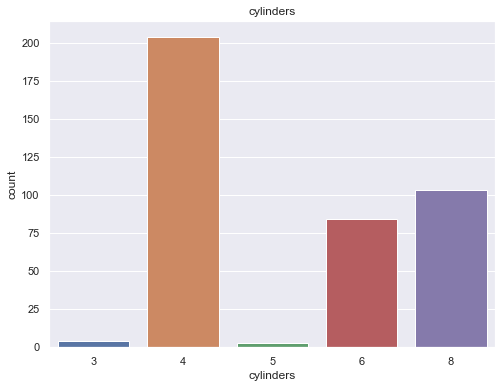

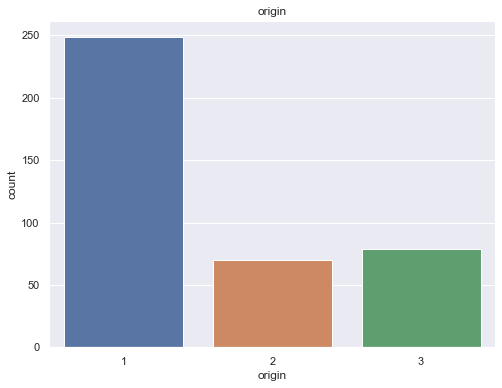

In [87]:
import matplotlib.pyplot as plt
for column in data_frame_for_countplot:
    plt.figure(figsize=(8,6))
    seaborn.countplot(x=column, data=data_frame_for_countplot).set(title=column)

In [88]:
data_frame_for_distribution.columns # return list of column headings and dtype

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')

In [89]:
# Draw graphs side by side
number_of_plots = len(data_frame_for_distribution.columns)
total_cols = 2
total_rows = number_of_plots // total_cols + (number_of_plots % total_cols >0)

number_of_plots, total_cols, total_rows

(6, 2, 3)

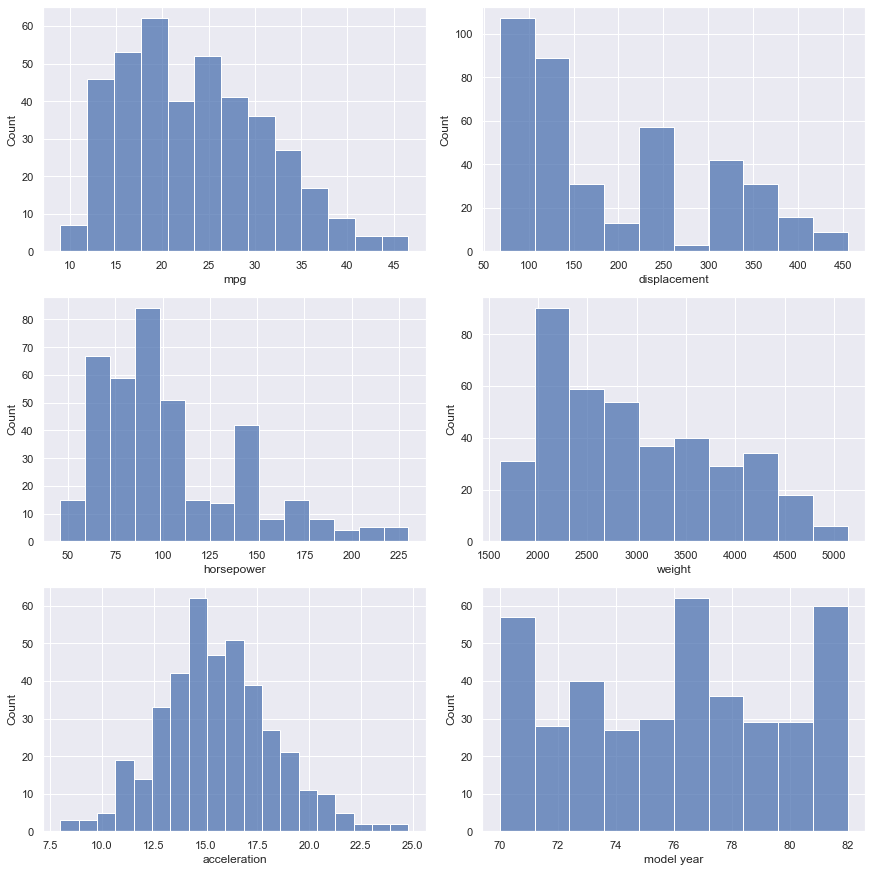

In [90]:
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, 
                        figsize=(12, 12), constrained_layout=True)
# constrained layout - automatically fit the graph,legend, labels etc

for i, column in enumerate(data_frame_for_distribution.columns):
    row = i//total_cols
    col = i % total_cols
    seaborn.histplot(data=data_frame_for_distribution,x=column, ax=axs[row, col])

In [93]:
data_frame_for_distribution.corr()

,mpg,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.804203,-0.778427,-0.831741,0.420289,0.579267
displacement,-0.804203,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model year,0.579267,-0.370164,-0.416361,-0.306564,0.288137,1.000000
